<a href="https://colab.research.google.com/github/taresh18/App-Reviews-Sentiment-Analysis/blob/main/scraping_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# download google play scraper
!pip install -qq google-play-scraper

In [ ]:
# import the required libraries

import json
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

In [ ]:
app_packages = [
  'com.anydo',
  'com.todoist',
  'com.ticktick.task',
  'com.habitrpg.android.habitica',
  'cc.forestapp',
  'com.oristats.habitbull',
  'com.levor.liferpgtasks',
  'com.habitnow',
  'com.microsoft.todos',
  'prox.lab.calclock',
  'com.gmail.jmartindev.timetune',
  'com.artfulagenda.app',
  'com.tasks.android',
  'com.appgenix.bizcal',
  'com.appxy.planner'
]

In [ ]:
len(app_packages)

15

In [ ]:
app_infos = []

for ap in tqdm(app_packages):
  info = app(ap, lang='en', country='us')
  del info['comments']  # we will add the comments later
  app_infos.append(info)

100%|██████████| 15/15 [00:02<00:00,  6.67it/s]


In [ ]:
def print_json(json_object):
  json_str = json.dumps(
    json_object, 
    indent=2, 
    sort_keys=True, 
    default=str
  )
  print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [ ]:
print_json(app_infos[0])

{
  "adSupported": false,
  "appId": "com.anydo",
  "containsAds": false,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "\ud83e\udd47 <b>\"#1 to do list app out there\u201d</b> - WSJ\r\n\ud83c\udfc6 <b>Editor's Choice</b> by Google\r\n\r\nOver 30M people rely on Any.do to stay organized and get more done.\r\nIt's a simple to do list app with reminders, planner & calendar - all in one.\r\n\r\n<b>\ud83e\udd47 \"A MUST HAVE APP\" (Lifehacker, NYTimes, USA TODAY).</b>\r\n\r\nAny.do is a free to-do list, planner & calendar app for managing and organizing your daily tasks, to-do lists, notes, reminders, checklists, calendar events, grocery lists, and more.\r\n\r\nOrganize your tasks & to-do list\r\n\r\n\u2022 ADVANCED CALENDAR & DAILY PLANNER - Keep your to-do list and calendar events always at hand with our calendar widget. Any.do to-do list & planner support daily calendar view, 3-day Calendar view, Weekly calendar view & agenda vi

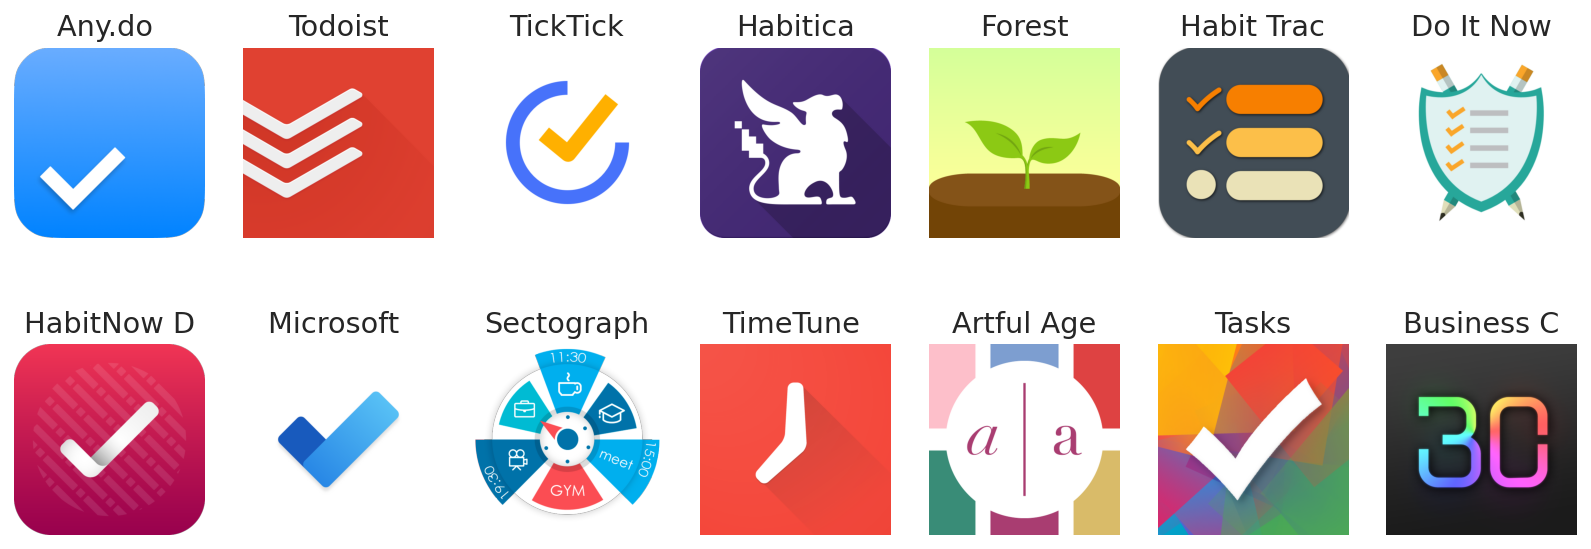

In [ ]:
def format_title(title):
  sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
  if sep_index != -1:
    title = title[:sep_index]
  return title[:10]

fig, axs = plt.subplots(2, len(app_infos) // 2, figsize=(14, 5))

for i, ax in enumerate(axs.flat):
  ai = app_infos[i]
  img = plt.imread(ai['icon'])
  ax.imshow(img)
  ax.set_title(format_title(ai['title']))
  ax.axis('off')

In [ ]:
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.head(n=3)

,title,description,descriptionHTML,summary,installs,minInstalls,realInstalls,score,ratings,reviews,...,contentRatingDescription,adSupported,containsAds,released,updated,version,recentChanges,recentChangesHTML,appId,url
0,Any.do - To do list & Calendar,"🥇 <b>""#1 to do list app out there”</b> - WSJ\r...",🥇 <b>&quot;#1 to do list app out there”</b> - ...,"Simple planner with to-do list, tasks, reminde...","10,000,000+",10000000,28888568,4.429140,455219,35883,...,None,False,False,"Nov 10, 2011",1672168610,Varies with device,None,None,com.anydo,https://play.google.com/store/apps/details?id=...
1,Todoist: to-do list & planner,Trusted by 30+ million people and teams worldw...,Trusted by 30+ million people and teams worldw...,Simple yet powerful to-do list. Habit planner ...,"10,000,000+",10000000,35968745,4.487136,249452,15667,...,None,False,False,"Nov 18, 2012",1672934844,Varies with device,None,None,com.todoist,https://play.google.com/store/apps/details?id=...
2,TickTick:To-do list & Tasks,🥇<b>Great to-do list app for new Android devic...,🥇<b>Great to-do list app for new Android devic...,"Time Management & Planner Reminder, Calendar,...","5,000,000+",5000000,5863123,4.654164,109251,6191,...,None,False,False,"Jun 19, 2013",1672395961,6.4.3.1,None,None,com.ticktick.task,https://play.google.com/store/apps/details?id=...


In [ ]:
app_infos_df.to_csv('apps.csv', index=None, header=True)

In [ ]:
app_reviews = []

for ap in tqdm(app_packages):
  for score in list(range(1, 6)):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
      rvs, _ = reviews(
        ap,
        lang='en',
        country='us',
        sort=sort_order,
        count= 200 if score == 3 else 100,
        filter_score_with=score
      )
      for r in rvs:
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        r['appId'] = ap
      app_reviews.extend(rvs)

100%|██████████| 15/15 [00:32<00:00,  2.16s/it]


In [ ]:
print_json(app_reviews[0])

{
  "appId": "com.anydo",
  "at": "2022-12-28 15:20:04",
  "content": "Don't use this app!! Any.do charged by credit card $29.99 without my permission, for a premium plan, after I'd used the free plan for quite a while. When questioned, their support team said that it was an automatic feature. Then told me that the only way to turn off this \"automatic\" feature was to use an app downloaded to my desktop. I only use the app on my phone and never on a desktop. They did also say that deleting this app from my phone will not cancel the automatic payment!!! Unbelievable!",
  "repliedAt": "2022-12-29 16:31:28",
  "replyContent": "A payment can only be made upon the user's authorization. Users can upgrade from the mobile app, desktop app and from promotional links and discount links. Once the subscription is created it will renew unless it has been canceled. All of this is according to our terms of service you agreed to once you upgraded.",
  "reviewCreatedVersion": "5.15.4.3",
  "reviewId":

In [ ]:
len(app_reviews)

17422

In [ ]:
app_reviews_df = pd.DataFrame(app_reviews)

In [ ]:
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,cea73061-3095-462b-82ce-2176c80744d8,Susan Krebs,https://play-lh.googleusercontent.com/a-/AD5-W...,Don't use this app!! Any.do charged by credit ...,1,20,5.15.4.3,2022-12-28 15:20:04,A payment can only be made upon the user's aut...,2022-12-29 16:31:28,most_relevant,com.anydo
1,d104483c-0558-4179-bf8a-2a0fddfcff4d,Adjunct Tavore,https://play-lh.googleusercontent.com/a/AEdFTp...,Edited to 1 star. It is fine for personal list...,1,41,5.15.4.2,2022-10-15 18:11:06,As we’ve announced on our Blog and sent by ema...,2022-10-20 10:14:08,most_relevant,com.anydo
2,a6b21375-312e-41b5-90ab-3d56273ca01b,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,This app was great until the latest update and...,1,27,4.12.0.5,2019-01-12 13:20:28,"We are sorry you feel this way, please note th...",2019-01-27 15:44:37,most_relevant,com.anydo
3,1177566d-6443-42ab-8320-7e8b3342cec8,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Product images show the month view at the top ...,1,8,None,2019-07-06 21:14:32,We appreciate the feedback. The images for iOS...,2019-07-09 11:45:56,most_relevant,com.anydo
4,82d2f0c3-dbff-4722-89fa-d8af997ba4ab,Hyco Syco,https://play-lh.googleusercontent.com/a/AEdFTp...,This app used to be great when paired with Ale...,1,5,4.15.9.6,2020-06-17 17:32:55,"Sorry about that, our team is currently workin...",2020-06-18 06:47:52,most_relevant,com.anydo


In [ ]:
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.to_csv('reviews.csv', index=None, header=True)